q4


In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from scipy.stats import shapiro
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.sandbox.stats.multicomp import TukeyHSDResults
from statsmodels.graphics.factorplots import interaction_plot
from pandas.plotting import scatter_matrix

In [2]:
iris=load_iris()

In [3]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
data_iris=pd.DataFrame(iris.data,columns=['sepalLength','sepalWidth','petalLength','petalWidth'])

In [5]:
data_iris1=pd.DataFrame(iris.target,columns=['target'])

In [6]:
ID=[]
for i in range(0,150):
    ID.append(i)

In [7]:
data=pd.DataFrame(ID,columns=['ID'])

In [8]:
data_iris_new=pd.concat([data_iris,data_iris1,data],axis=1)

In [9]:
data_iris_new.columns

Index(['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth', 'target',
       'ID'],
      dtype='object')

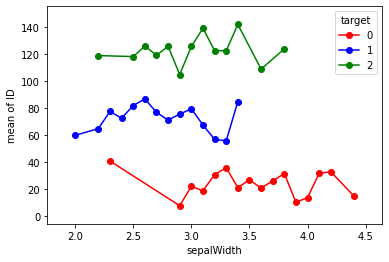

In [10]:
fig = interaction_plot(data_iris_new.sepalWidth,data_iris_new.target,
                       data_iris_new.ID,colors=['red','blue','green'],ms=12)

In [11]:
data_iris_new.describe()

,sepalLength,sepalWidth,petalLength,petalWidth,target,ID
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000,74.500000
std,0.828066,0.435866,1.765298,0.762238,0.819232,43.445368
min,4.300000,2.000000,1.000000,0.100000,0.000000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000,37.250000
50%,5.800000,3.000000,4.350000,1.300000,1.000000,74.500000
75%,6.400000,3.300000,5.100000,1.800000,2.000000,111.750000
max,7.900000,4.400000,6.900000,2.500000,2.000000,149.000000


In [12]:
print(data_iris_new['sepalWidth'].groupby(data_iris_new['target']).mean())

target
0    3.428
1    2.770
2    2.974
Name: sepalWidth, dtype: float64


In [13]:
data_iris_new.mean()

sepalLength     5.843333
sepalWidth      3.057333
petalLength     3.758000
petalWidth      1.199333
target          1.000000
ID             74.500000
dtype: float64

In [14]:
stats.shapiro(data_iris_new['sepalWidth'][data_iris_new['target']])

ShapiroResult(statistic=0.7824662327766418, pvalue=1.1907719276761652e-13)

In [15]:
# Check equality of variance between groups(levene/bartlett test)

p_value=stats.levene(data_iris_new['sepalWidth'],data_iris_new['target'])

p_value

LeveneResult(statistic=55.1738582824089, pvalue=1.1695737027924642e-12)

- Iris dataset for Anova testing.Here, we have only one independent variable i.e. Species(iris-setosa,iris-versicolor,iris-virginica) which are in categorical and we took sepal width as a continous variable. For exmaple, if someone wants looked at sepal width in iris-setosa,iris-versicolor and iris virginica,there would be three species analyzed and therfore three groups to the analysis. In iris dataset we have only one independent variable i.e. Species so we are doing one-way Anova testing.

In [16]:
F_value,P_value=stats.f_oneway(data_iris_new['sepalWidth'],data_iris_new['target'])

In [17]:
print("F_value=",F_value,",","P_value=",P_value)

F_value= 737.2872570149498 , P_value= 1.418242288711535e-82


In [18]:
if F_value>1.0:
    print("******SAMPLES HAVE DIFFERENT MEAN******")
else:
    print("******SAMPLES HAVE EQUAL MEAN******")

******SAMPLES HAVE DIFFERENT MEAN******


In [19]:
if P_value<0.05:
    print("******REJECT NULL HYPOTHESIS******")
else:
    print("******ACCEPT NULL HYPOTHESIS******")

******REJECT NULL HYPOTHESIS******


q5